In [ ]:
import warnings
warnings.filterwarnings("ignore") # <-- ESTO LO HE PUESTO PARA QUE SEA TODO MAS LIMPIO; NO PONER EN EL CODIGO A ENTREGAR

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import Math, display
sp.init_printing()
n = 50

def show(*args):
    out = ""
    for arg in args:
        if isinstance(arg, (sp.Expr, sp.Eq)):
            arg = sp.latex(arg)
        else:
            arg = str(arg)
        out += arg
    display(Math(out))
    
qq = "\quad "

# **FORMULACIÓ I ANALISI DEL SISTEMA**

In [ ]:
# FORMULACIÓ:

#   -> AMBIT D'ESTUDI
#       -> Acotar l'objecte d'estudi
#       -> Revisar el context (present, passat, futur)
#       -> permet fer primeres assumcions

#   -> OBJECTIU D'ESTUDI 
#       -> Mesurable --> ha de poder-se mesurar
#       -> Raonable --> hem de poder tenir recursos per l'estudi (suficients dades) <-- pot ser util com a analisi critic/resultat
#       -> Útil --> ha de tenir utilitat

#   -> PRECISIÓ DE L'ESTUDI
#       -> Criteri de qualitat de l'estudi <-- pot ser util per l'analisi critic/resultat




# ANALISI DEL SISTEMA:

#   -> CONTEXT
#       -> Definir ambit/situació --> definir objectius --> identificar sistema i context

#   -> FACTORS I ESDEVENIMENTS MESURABLES
#       -> Identificar els factors més rellevants --> Analitzar unitats i rellevancia --> considererar elements negligibles --> SEMPRE MANTENIR MODEL SENCILL
#       -> Triarem factors que a priori afectaran més al resultat --> despres analitzar la seva sensibilidad
#       -> En el cicle de modelització podem afegir o eliminar factors --> podem tornar en rere en els passos per simplificar o arreglar model

#   -> OBSERVACIÓ "REALITAT"
#       -> Analitzar dades obtingudes --> graficar y explicar comportaments aparents --> permet plantejar un model sencill inicial

#   -> RELACIONS I COMPORTAMENT D'ESTATS
#       -> Agrupar i relacionar factors --> subsistemes, categories, efectes...
#       -> Identificar relacions i comportament dels factors --> proporcionalitat i comportament --> permet plantejar el model
#       -> Identificar estats i esdeveniments --> IMPORTANT SI SISTEMA CAMBIA AMB TEMPS --> permet plantejar noves relacions

#**MODELITZACIÓ**

## **PLANTEJAMENT MODEL**

In [ ]:
# ANALISI DIMENSIONAL: <-- util i és recomana fer
#   -> Treballar amb conceptes simplificats: L,T,M...
#   -> Recomana passar sempre unitats al sisteme internacional
#   -> Model ha de ser consistent --> ha de donar les unitats esperades
#   -> És pot construïr un model amb l'analisi dimensional --> recamanat si tenim poques variables i amb unitats amb diferents màgnituds

# CONSTRUCCIÓ MODELS MATEMÀTICS: <-- sempre fer model sencill i simple --> (en cas de panik utilitzar una recta :D)
#   -> Analisi Dimensional --> Analitzar les relacions i comportaments del paràmetres
#   -> Representació diferencial --> plantejar EDOs
#   -> Plantejament equacions per parts/diferencies --> dP = a dt ==> P_i - P_{i-1} = a (t_i - t_{i-1}) <-- forma discreta i iterativa

# ANÀLISI DEL MODEL:
#   -> Pes relatiu dels coeficients
#   -> Sensibilidad del model --> coeficients de sensitivitat : Ci = xi/M * dM/dxi; M = Model, xi = paràmetre i

# INTERPRETACIÓ DEL MODEL EN EL CONTEXT: <-- imaginar el perque el model és així
#   -> Tracta de separar els components del model --> perque creix, on decreix més, punts d'inflexió, extrems relatius...
#   -> Analitza representacions gràfiques dels resultats --> té sentit, fa el que esperem...
#   -> Compara els resultats amb els valors esperats 
#   -> Petit anàlisi crític del resultat


##**RESOLUCIÓ DEL MODEL**

In [ ]:
# RESOLDRE EDOs
from sympy.abc import t, C, V, T
Q = sp.Symbol('Q', nonzero=True, positive=True)

x = sp.Function('x')(t)

xp = sp.diff(x, t)

fx = - x * Q/V

eq = sp.Eq(xp, fx)

ics = {x.subs(t, 0): C}

sol = sp.dsolve(eq, x, ics=ics)
xt = sol.rhs
show(xt)

<IPython.core.display.Math object>

In [ ]:
# RESOLDRE SISTEMA EDOs
# Declaració funcións
from sympy.abc import l

Q = sp.symbols("Q")

m1 = sp.Function("m_1")(t)
m2 = sp.Function("m_2")(t)

dm1 = -(Q+l)*m1
dm2 = Q*(m1 - m2) -m2*l

# Resolució sistema EDOS
m1p = sp.diff(m1, t)
eq1 = sp.Eq(dm1,m1p)

m2p = sp.diff(m2, t)
eq2 = sp.Eq(dm2,m2p)

M1, M2 = sp.dsolve([eq1, eq2], [m1,m2])

show(M1,qq,M2)
M1 = M1.rhs
M2 = M2.rhs

<IPython.core.display.Math object>

Este mensaje sale porque el dsolve no puede resolver esto asi que enchufamos el mètodo numèrico; chilling todo va bien :D


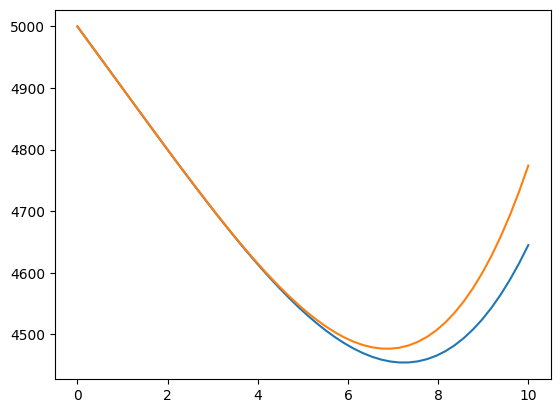

In [ ]:
# RESOLDRE APROXIMACIÓ NÚMERICA (TAYLOR) <-- CUIDADO CON EL GRADO DE APROXIMACION DE TAYLOR --> recomendat fer n = 3 i n= 4 --> si eres pro i sobra el tiempo haz n = 5 i n= 6
from sympy.abc import t, a, b, m, T, C, D
T0, Tn = sp.symbols('T_0 T_n')
P = sp.Function('P', real=True)(t)

dP = sp.diff(P, t)
R = a + b * sp.sin(2 * sp.pi * (t - T0) / Tn) 
M = m

eq = sp.Eq(dP, R * P - m)

try:
  Pt = sp.dsolve(eq, P) #<-- non preocupare, tarda en ejecutar-se esto :D
except:
  print("Este mensaje sale porque el dsolve no puede resolver esto asi que enchufamos el mètodo numèrico; chilling todo va bien :D")

  # Aproximacions 
  cons = {'C1': C}
  valors = {a: 0.00001, b: -0.0001, T0: 0, Tn: 4, m: 100, C: 5000}

  Pt5 = sp.dsolve(eq, P, hint='1st_power_series', n=5) # <-- tranqui tarda aqui bastante
  fPt5 = sp.lambdify('t', Pt5.rhs.subs(cons).subs(valors).removeO())

  Pt6 = sp.dsolve(eq, P, hint='1st_power_series', n=6) # <-- tranqui tarda aqui bastante más....
  fPt6 = sp.lambdify('t', Pt6.rhs.subs(cons).subs(valors).removeO())

  x = np.linspace(0, 10)
  p6 = fPt6(x)
  p5 = fPt5(x)
  l = plt.plot(x, p6, x, p5)

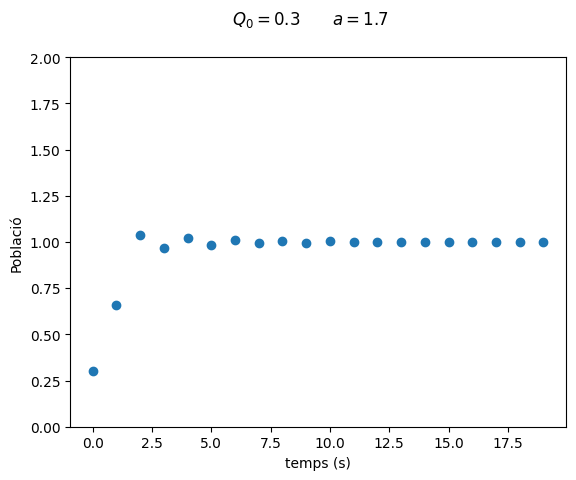

In [ ]:
# SIMULACIÓ --> EQUACIONS EN DIFERENCIES
q = 0.3
a = 1.7

X = list(range(20))
Y = []
for x in X:
    Y.append(q)
    q = q + a * q * (1 - q)

fig, ax = plt.subplots()
fig.suptitle('$Q_0 = 0.3 \qquad a = 1.7$')

ax.scatter(X, Y)
ax.set_ylabel('Població')
ax.set_xlabel('temps (s)')
ax.set_ylim([0, 2])

plt.show()

## **EXEMPLES DE MODELS TIPICS**

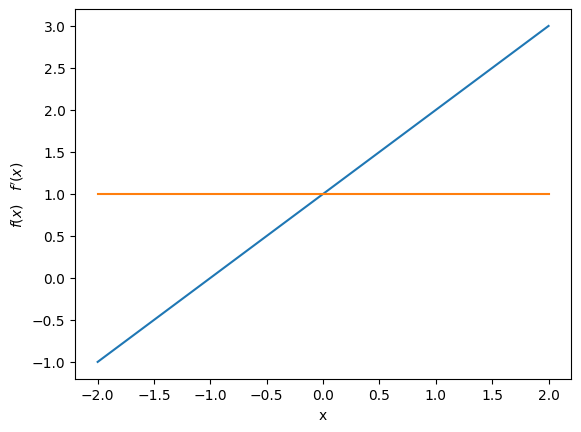

In [ ]:
# LINEAL --> f(x) = ax + b; f'(x) = a
X = np.linspace(-2, 2, n)
Y1 = 1 + X
Y2 = np.ones(n)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

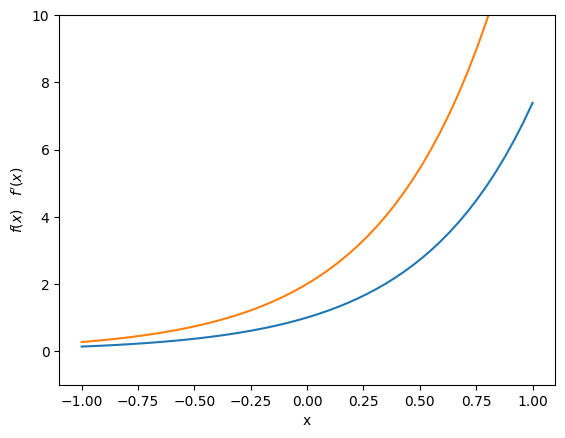

In [ ]:
# CREIXEMENT EXPONENCIAL --> f(x) = a*e^{bx}+c; f'(x) = f(x)
X = np.linspace(-1, 1, n)
Y1 = np.exp(2 * X)
Y2 = 2 * np.exp(2 * X)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 10])
plt.show()

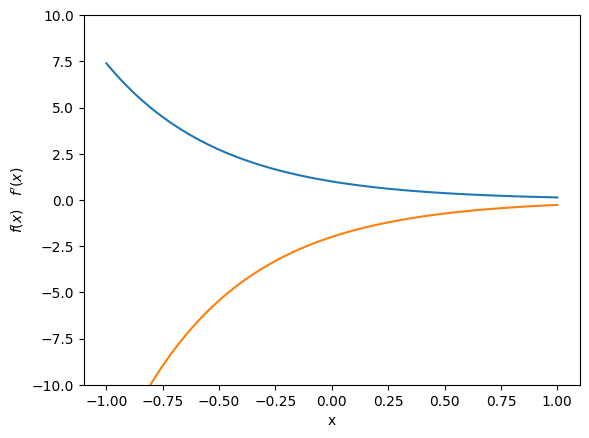

In [ ]:
# DECREIXEMENT EXPONENCIAL --> f(x) = a*e^{-bx}+c; f'(x) = -f(x)
X = np.linspace(-1, 1, n)
Y1 = np.exp(-2 * X)
Y2 = -2 * Y1

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-10, 10])
plt.show()

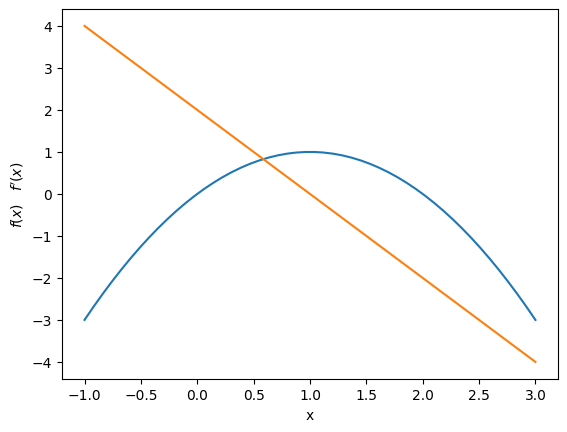

In [ ]:
# MÀXIM SIMPLE / PARÀBOLA CÒNCAVA --> f(x) = a - (x-b)^2; f'(x) = -x
X = np.linspace(-1, 3, n)
Y1 = 1 - (X - 1)**2
Y2 = -2 * (X - 1)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

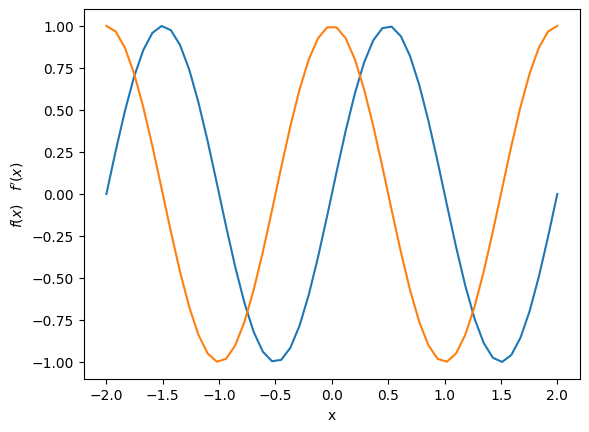

In [ ]:
# OSCIL·LACIÓ --> f(x) = a*sin(bx+c); f'(x) = ab*cos(bx+c)
X = np.linspace(-2, 2, n)
Y1 = np.sin(np.pi * X)
Y2 = np.cos(np.pi * X)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

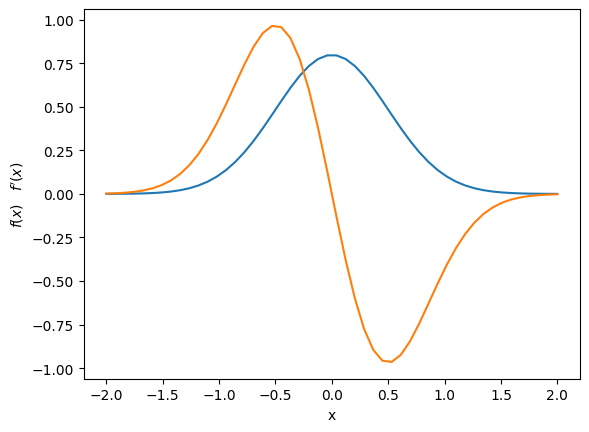

In [ ]:
# DISTRIBUCIÓ NORMAL
X = np.linspace(-2, 2, n)
Y1 = np.sqrt(2 / np.pi) * np.exp(-2 * X * X )
Y2 = - 4 * X * Y1

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

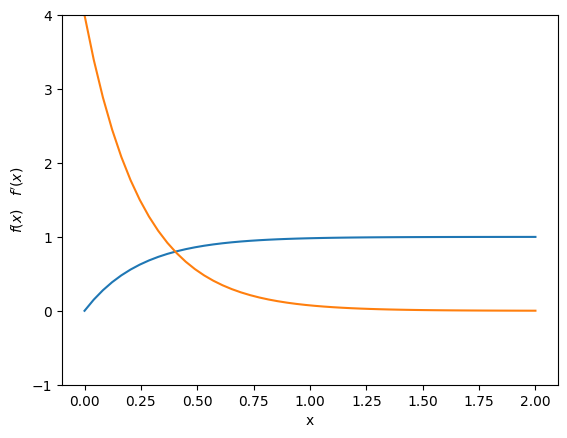

In [ ]:
# CREIXEMENT LIMITAT --> f(x) = a-b*e^{-cx}; f'(x) = f(x)
X = np.linspace(0, 2, n)
Y1 = (1 - np.exp(-4 * X))
Y2 = 4 * (1 - Y1) 

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 4])
plt.show()

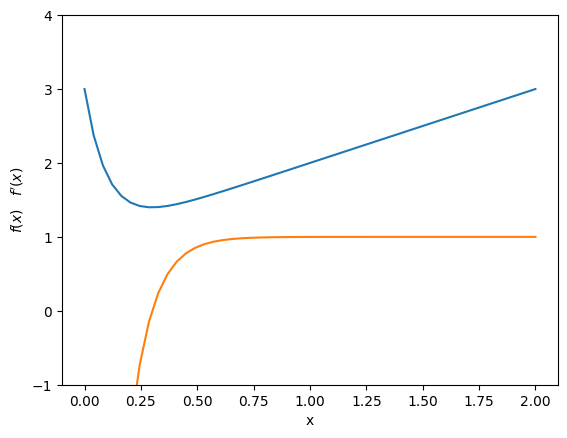

In [ ]:
# CREIXEMENT ASSIMPTÓTIC --> f(x) = a + bx + c*e^{-dx}
X = np.linspace(0, 2, n)
Y1 = 1 + X + 2 * np.exp(-10 * X)
Y2 = 1 - 20 * np.exp(-10 * X)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 4])
plt.show()

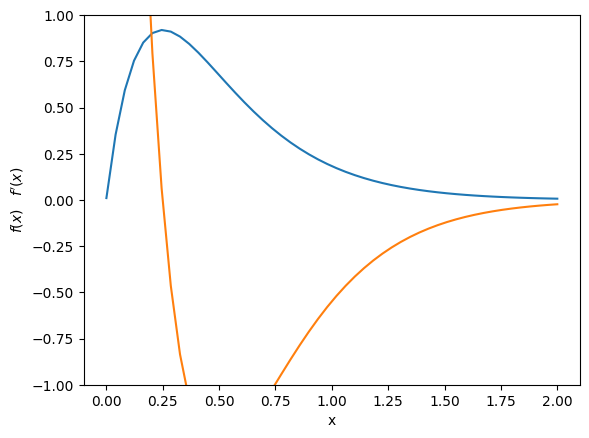

In [ ]:
# MÀXIM AMB CUA --> f(x) = ax*e^{-x/b}
X = np.linspace(0.001, 2, n)
Y1 = 10 * X * np.exp(-4 * X)
Y2 = Y1 * ( 1 / X - 4)

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
ax.set_ylim([-1, 1])
plt.show()

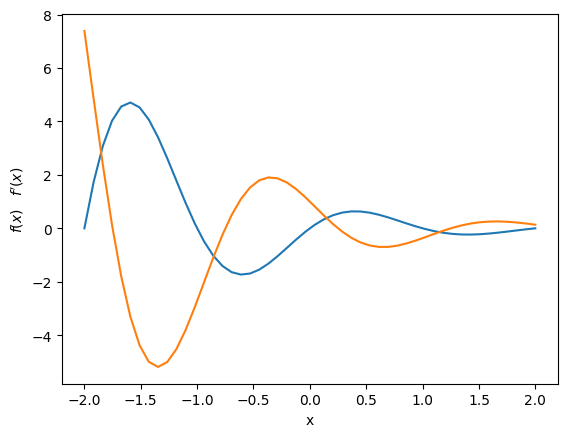

In [ ]:
# OSCIL·LACIÓ ESMORTEIDA --> a*e^{-x/b}*sin(cx+d)
X = np.linspace(-2, 2, n)
Y1 = np.exp(-X) * np.sin(np.pi * X)
Y2 = np.exp(-X) * (np.cos(np.pi * X) - np.sin(np.pi * X))

fig, ax = plt.subplots()

ax.plot(X, Y1, X, Y2)
ax.set_ylabel('$f(x) \quad f\'(x)$')
ax.set_xlabel('x')
plt.show()

#**ANALISI D'INCERTESES**

In [ ]:
# EXPERIMENTACIÓ:
#   -> Necessàries per refutar el nostre model, calibrar-lo i verificar-lo --> analisi critica i validació del model
#         -> Resolució --> Diferencia entre dos punts distingibles d'un sistema de mesura.
#         -> Precisió --> Diferencia entre el resultat de la mesura amb el seu valor real.
#         -> Error --> Distribució aleatòria dels valors obtinguts al voltant dels valors mesurats.

# ERROR I INCERTESES:
#   -> Els valors de les mesures tindran errors
#   -> Els paràmetres del model també tindran errors
#   -> Els càlculs tindran certa resolució numèrica
#   ERRORS:
#         -> Error estadístic: Aquell que varia durant el procés de mesura --> El valor esperat és ma mitjana de les observacions +- la variança de les observacions
#         -> Error sistemàtic: Aquell que no varia durant el procés de mesura <-- CONSIDERAR NEGLIGIBLES ==> MÉS SIMPLE :D
#   INCERTESES (PROPAGACIÓ D'ERRORS):
#         -> Monte Carlo --> NO USAR
#         -> Serie Taylor --> Uc = +-sqrt{Br^2 + Sr^2}; Uc = estimació error del resultat (interval d'incertesa) <-- EXPLIQUEM EN DETALL EN VALIDACIÓ DEL MODEL
#                 -> Br = estimació de l'error sistemàtic; Sr = estimció error estadístic
#   INCERTESA RELATIVA:
#         -> Ur = \sum Ui^2; Ui^2 = (Ci*Ii)^2 incertesa del relativa de la predicció
#                 -> Ci = xi/M * dM/dxi coeficient de sensitivitat del paràmetre i-essim
#                 -> Ii = incertesa de les mesures del paràmetre i-essim

# NIVELL DE CONFIANÇA:
#   -> Fent servir t-test: Ur = t*Uc = t*(Br^2 + Sr^2) ----> t = 2 si mostres grans (N > 9 per exemple)
#   -> Fent servir covariances entre variables i mesures independents: Ur = \sum (Ui*I)^2


<IPython.core.display.Math object>

----------------------------------------


<IPython.core.display.Math object>

----------------------------------------


<IPython.core.display.Math object>

----------------------------------------


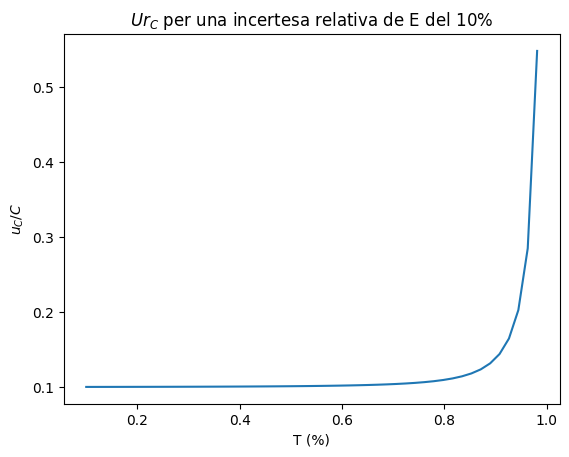

In [ ]:
# Concentració de partícules
from sympy.abc import T, E, L

C = - sp.log(T) / (E * L)
show("C =", C)
print("-"*40)

# Coeficients de sensitivitat
CT = T / C * sp.diff(C, T)
CE = E / C * sp.diff(C, E)
CL = L / C * sp.diff(C, L)
show(CT, qq, CE, qq, CL)
print("-"*40)

# Incertesa relativa de C ---> Assumint que les incerteses de T, E i L són independents
urE = sp.symbols('ur_E')

CurE = CE * urE
CurL = CL * 0.01
CurT = CT * 0.01

urC2 = CurE**2 + CurL**2 + CurT**2
show("ur^2_C=", urC2)
print("-"*40)

# Ur_C per una incertesa relativa de E del 10%
x = np.linspace(0.1, 1.0, 50)
furC = sp.lambdify(T, sp.sqrt(urC2).subs(valors).subs(urE, 0.1), "numpy")

urc = furC(x)

plt.plot(x, urc)
plt.xlabel('T (%)')
plt.ylabel('$u_C/C$')
plt.title("$Ur_C$ per una incertesa relativa de E del 10%")
plt.show()

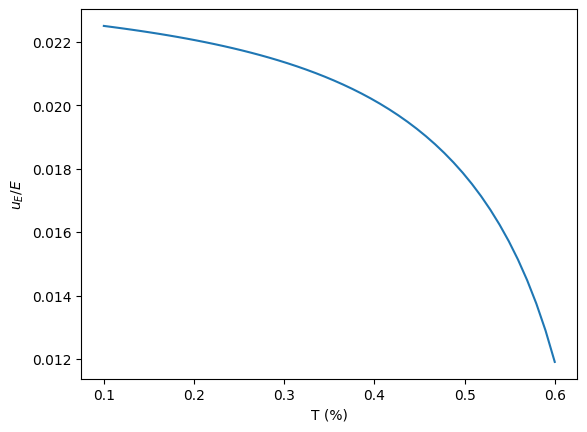

In [ ]:
# Incertesa de E perquè U_C/C sigui del 5% amb un nivell de confiança del 95%
# Assumint suficient estadística per a tindre t(95%) = 2

urE2 = sp.solve(sp.Eq(urC2, (0.05 / 2)**2), urE**2)[0]

x = np.linspace(0.1, 0.6, 50)
furE = sp.lambdify(T, sp.sqrt(urE2).subs(valors), "numpy")

ure = furE(x)

plt.plot(x, ure)
plt.xlabel('T (%)')
plt.ylabel('$u_E/E$')
plt.show()

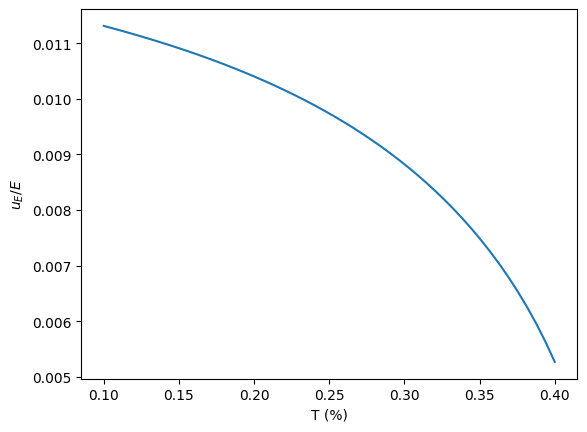

<IPython.core.display.Math object>

In [ ]:
# Incertesa de E perquè U_C/C sigui del 5% amb un nivell de confiança del 95%
# En el cas que només tenim 4 mesures independents
from scipy import stats
t = stats.t.interval(confidence=0.95, df=(4 - 1))
urE2 = sp.solve(sp.Eq(urC2, (0.05 / t[1])**2), urE**2)[0]

x = np.linspace(0.1, 0.4, 50)
furE = sp.lambdify(T, sp.sqrt(urE2).subs(valors), "numpy")

ure = furE(x)

plt.plot(x, ure)
plt.xlabel('T (%)')
plt.ylabel('$u_E/E$')
plt.show()

show("t_{95\%}(4) = ", t[1])

#**VALIDACIÓ I VERIFICACIÓ**

In [ ]:
# VERIFICACIÓ:
#   -> Verificació del codi
#       -> Comprovar que el codi funciona
#       -> Control de qualitat del codi
#       -> Testatge funcional
#   -> Verificació del càlcul
#       -> Quantificar l'error numèric
#       -> Comprovar la convergència de la simulació
#       -> Verificació de dades d'entrada i sortida

# VALIDACIÓ:
#   -> Estimar el nivell de precisió del model --> avaluar l'error del model ---> estimar l'error del model; difèrencia entre el valor mesurat i la predicció del model
#   -> Quantificar el nivell de confiança en el resultat del model --> de les incerteses de les mesures i les incerteses del resultat avaluarem l'error del model
#   -> El criteri per validar el model és el definit a l'inici del cicle de modelització --> Si l'error del model és superior al necessari, revisar el model/mesures --> analisi critica

# ERROR EXPERIMENTAL I DE SIMULACIÓ:
#   -> ERRORS
#         -> Dades experimentals --> errors estadístics i sistemàtics: e_d = e_e + e_s
#         -> Simulacions --> errors del model, els numèrics i els dels paramètrics: e_s = e_m + e_n + e_p
#   -> Avaluar la discrepància del model indirectament mitjançant les mesures i la simulació: E = S-D
#   -> CONSIDERACIONS per a simplificar:
#         -> No errors de calcul --> e_n = 0
#         -> Si no incerteses --> e_p = 0

# DISCREPÀNCIA EXPERIMENTAL I DEL MODEL:
#   -> Indirectament podem obtenir que l'error del model és: e_m = E-(d_n + d_p - d_d) <--- Pot servir per a avaluar la validesa del model
#         -> Estimant els errors mitjançant incerteses construim l'incertesa de la validació: u_v = sqrt{u_n^2 + u_p^2 + u_d^2}
#         -> E és una estimació de l'error del model i u_v l'incertesa --> E +- u_v <--- podem construïr l'interval de confiança

In [ ]:
# EXEMPLE ESTIMACIÓ DE L'INCERTESA DEL MODEL MITJANÇANT 
from scipy import stats
from sympy.abc import rho, epsilon, mu, Q, L, d, f
Re = sp.symbols('Re')

# INTRODUCIMOS DATOS DE FORMAQUE PODAMOS HACER EL EJEMPLO PERO ETOS DATOS DE AQUI SERIA UN ARCHIVO PANDA... LASTIMA QUE NO PODAMOS PONER UN EJEMPLO DE PANDAS D:
p = np.array([4,354,23,5,2,5,2,3,1,23,5,3,5,4])
q = np.array([16,3,4,5,8,4,3,2,1])

valors = {rho: 1000, epsilon: 0.01, mu: 1.2E-3, L: 1000, d: 0.15}
mesures = {Q: q.mean()}

# DP = f * 8 * rho * Q**2 * L / (sp.pi**2 * d**5) <-- MODEL
Re = 4 * Q * rho / (sp.pi * mu * d)
f = 1 / (-1.8 * sp.log(6.9 / Re + (epsilon/d/3.7)**1.11))**2
DP = f * 8 * rho * Q**2 * L / (sp.pi**2 * d**5)

# Derivades parcials
SL = sp.diff(DP, L).subs(valors).subs(mesures).n()
SQ = sp.diff(DP, Q).subs(valors).subs(mesures).n()
Sr = sp.diff(DP, rho).subs(valors).subs(mesures).n()
Sd = sp.diff(DP, d).subs(valors).subs(mesures).n()
Se = sp.diff(DP, epsilon).subs(valors).subs(mesures).n()
Sm = sp.diff(DP, mu).subs(valors).subs(mesures).n()
show(SL, qq,
     SQ, qq,
     Sr, qq,
     Sd, qq,
     Se, qq,
     Sm, qq,
)
print("-"*120)

# Incertesa dels paràmetres al quadrat
up2 = np.sum(np.power([
    SL * valors[L] * 0.001,
    SQ * q.std(),
    Sr * valors[rho] * 0.001,
    Sd * valors[d] * 0.001,
    Se * valors[epsilon] * 0.001,
    Sm * valors[mu] * 0.001,
], 2))

# Incertesa de l'estimació de la discrepància
uD = p.std()
uV = np.sqrt(float(uD**2 + up2))
print("Incertesa de l'estimació de la discrepància:",uV)
print("-"*120)

# Discrepància
S = np.mean(p)
D = q.mean()
E = S - D

# Discrepància
show("E = %0.f \pm %0.f Pa" % (E, uV))
print("-"*120)

# Error relatiu del model
ur = E/S
print(ur)
print("-"*120)

# Nivell de confiança per un error del 5%
t = 0.05 / ur
l, h = stats.t.cdf([-t, t], 1000)
CL = h - l
print(CL)

<IPython.core.display.Math object>

------------------------------------------------------------------------------------------------------------------------
Incertesa de l'estimació de la discrepància: 7252648192.721206
------------------------------------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

------------------------------------------------------------------------------------------------------------------------
0.8370032903062516
------------------------------------------------------------------------------------------------------------------------
0.047622899521129636


#**EXEMPLES**

##**EXEMPLE 1: Plou a bots i barrals**

In [ ]:
from sympy.physics.units.systems import SI
from sympy.physics.units import meter, second, liter, hour, degree, convert_to
from sympy import sin, cos, pi, Abs
from sympy.abc import D, v, u, theta, x, y, z
flux = sp.symbols("\phi")

# Representació matemàtica de variables (unitats per l'analisi dimensional)
valors = {
    D: 1000 * meter,
    flux: 4 * liter / meter/ meter / hour,
    v: 2 * meter / second,
    u: 4 * meter / second,
    theta: 10 * pi / 180,
    x: 0.50 * meter,
    y: 0.20 * meter,
    z: 1.80 * meter,
}

# Representació matemàtica de les relacions
t = D / v
Vs = flux * t
Vf = flux * t * u *sin(theta)

show(
    "V_s = ", Vs, qq,
    "V_f = ", Vf,
)

<IPython.core.display.Math object>

In [ ]:
# Analisi dimensional
show(
    SI.get_dimensional_expr(Vs.subs(valors)), qq,
    SI.get_dimensional_expr(Vf.subs(valors)),
)

<IPython.core.display.Math object>

In [ ]:
# Analisi del model --> plantejament dels paràmetres del model
I = flux / u

Ss = x * y
Vs = I * t * u * cos(theta) * Ss

Sf = x * z
Vf = I * t * (u * sin(theta) + v) * Sf

show(
    "V_s = ", Vs, qq,
    SI.get_dimensional_expr(Vs.subs(valors)), qq,
    "V_f = ", Vf, qq,
    SI.get_dimensional_expr(Vf.subs(valors)),
)

<IPython.core.display.Math object>

In [ ]:
# Analisi del model --> plantejament del model
V = Vs + Vf

show(
    "V = ", sp.simplify(V), qq,
    SI.get_dimensional_expr(V.subs(valors)), 
)

<IPython.core.display.Math object>

In [ ]:
# Analisi del model --> substitució de les variables
v_ms = sp.symbols("v_{m/s}")

val = valors.copy()
val[v] = v_ms * meter / second
val[flux] = convert_to(val[flux], liter / meter/ meter / second)

V_v = sp.simplify(V.subs(val) / liter)

show("V(v_{m/s}) = ", V_v)

<IPython.core.display.Math object>

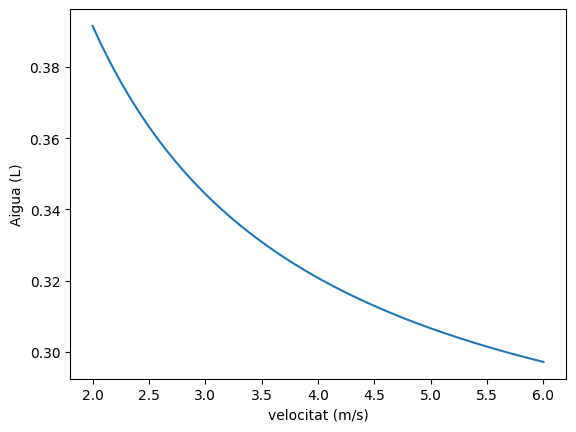

<IPython.core.display.Math object>

In [ ]:
# Analisi del model --> visualització del comportament del model
V_lam = sp.lambdify(v_ms, V_v, "numpy")

X = np.linspace(2, 6, 50)
Y = V_lam(X)

plt.plot(X, Y)
plt.xlabel('velocitat (m/s)')
plt.ylabel('Aigua (L)')
plt.show()

show("V_{2m/s} = ", V_lam(2), qq, "V_{6m/s} = ", V_lam(6))

In [ ]:
# Experiment --> plantejament del model
from sympy.abc import d
valors[d] = 0.05 * meter

S = pi * (d/2)**2

Vs = I * t * u * S
Vf = I * t * (u * sin(theta) + v) * S

V = Vs + Vf

show(
    "V = ", sp.simplify(V), qq,
    SI.get_dimensional_expr(V.subs(valors)), 
)

<IPython.core.display.Math object>

In [ ]:
# Experiment --> simulació / predicció dels resultats
v_ms = sp.symbols("v_{m/s}")

val = valors.copy()
val[v] = v_ms * meter / second
val[flux] = convert_to(val[flux], liter / meter/ meter / second)

Vs_v = sp.simplify(Vs.subs(val) / liter)
Vf_v = sp.simplify(Vf.subs(val) / liter)

show("Vs_{2m/s} = ", Vs_v.subs({v_ms: 2}).n(2), qq, "Vf_{2m/s} = ", Vf_v.subs({v_ms: 2}).n(2))
show("Vs_{1m/s} = ", Vs_v.subs({v_ms: 1}).n(2), qq, "Vf_{1m/s} = ", Vf_v.subs({v_ms: 1}).n(2))
show("Vs_{0.5m/s} = ", Vs_v.subs({v_ms: 0.5}).n(2), qq, "Vf_{0.5m/s} = ", Vf_v.subs({v_ms: 0.5}).n(2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##**EXEMPLE 2: Dissolució**

In [ ]:
# PLantejament del model
from sympy.abc import t, C, V, T
Q = sp.Symbol('Q', nonzero=True, positive=True)

x = sp.Function('x')(t)

xp = sp.diff(x, t)

fx = - x * Q/V

eq = sp.Eq(xp, fx)

ics = {x.subs(t, 0): C}

sol = sp.dsolve(eq, x, ics=ics)
xt = sol.rhs
show(xt)

<IPython.core.display.Math object>

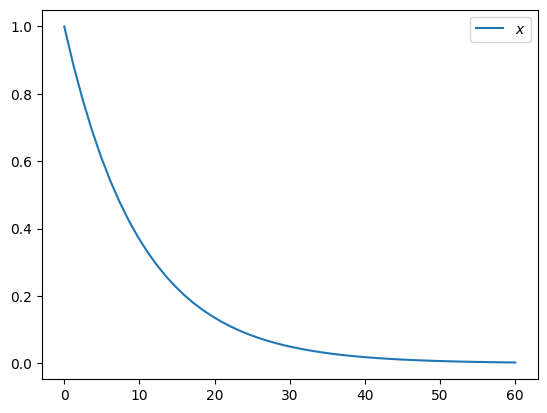

In [ ]:
# Comportament del model
valors = {C: 1, V: 1000000, Q: 100000} # mg/l, l, l/min

fxt = sp.lambdify(t, xt.subs(valors))

temps = np.linspace(0, 60, 50)
con = fxt(temps)
l = plt.plot(temps, con)
plt.legend(["$x$"])

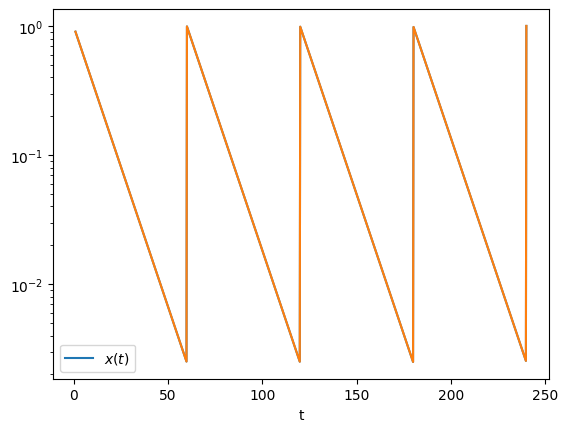

In [ ]:
# Comportament del model (en el cicle de 60segons)
valors = {C: 1, V: 1000000, Q: 100000}

X = np.linspace(1, 4*60, 1000)
Y=[]
x0=0
Cx0=0
for x in X:
    if x - x0 >= 60:
        x0 += 60
        Cx0 = xt.subs(valors).subs(t, 60).evalf()
        valors = {C: 1 + Cx0 , V: 1000000, Q: 100000}
        
    Y.append(xt.subs(valors).subs(t, x-x0))

fig, ax = plt.subplots()
ax.plot(X, Y)
ax.semilogy(X, Y)
ax.legend(['$x(t)$'])
ax.set_xlabel('t')

plt.show()

##**EXEMPLE 3: Concentració de partícules**

In [ ]:
# Concentració de partícules --> modelatge
from sympy.abc import T, E, L

C = - sp.log(T) / (E * L)
show("C =", C)

<IPython.core.display.Math object>

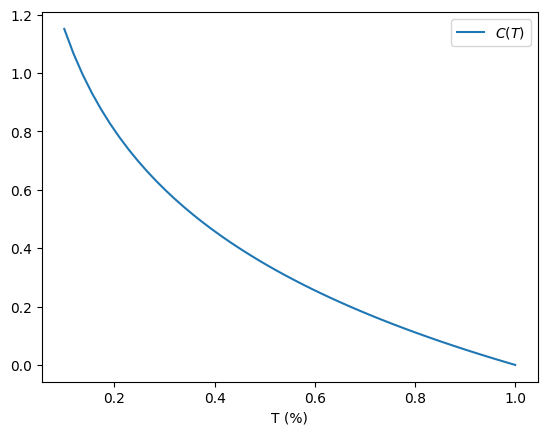

In [ ]:
# Representació del model
valors = {E: 0.5, L: 4}
x = np.linspace(0.1, 1, 50)
fC = sp.lambdify(T, C.subs(valors), "numpy")

c = fC(x)

fig, ax = plt.subplots()

ax.plot(x, c)
ax.legend(['$C(T)$'])
l = ax.set_xlabel('T (%)')

In [ ]:
# Coeficients de sensitivitat
CT = T / C * sp.diff(C, T)
CE = E / C * sp.diff(C, E)
CL = L / C * sp.diff(C, L)
show(CT, qq, CE, qq, CL)

<IPython.core.display.Math object>

In [ ]:
# Incertesa relativa de C
# Assumint que les incerteses de T, E i L són independents
urE = sp.symbols('ur_E')

CurE = CE * urE
CurL = CL * 0.01
CurT = CT * 0.01

urC2 = CurE**2 + CurL**2 + CurT**2
show("ur^2_C=", urC2)

<IPython.core.display.Math object>

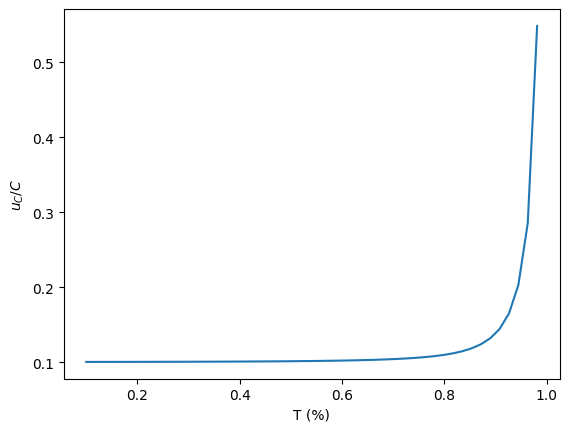

In [ ]:
# Ur_C per una incertesa relativa de E del 10%
x = np.linspace(0.1, 1.0, 50)
furC = sp.lambdify(T, sp.sqrt(urC2).subs(valors).subs(urE, 0.1), "numpy")

urc = furC(x)

plt.plot(x, urc)
plt.xlabel('T (%)')
plt.ylabel('$u_C/C$')
plt.show()

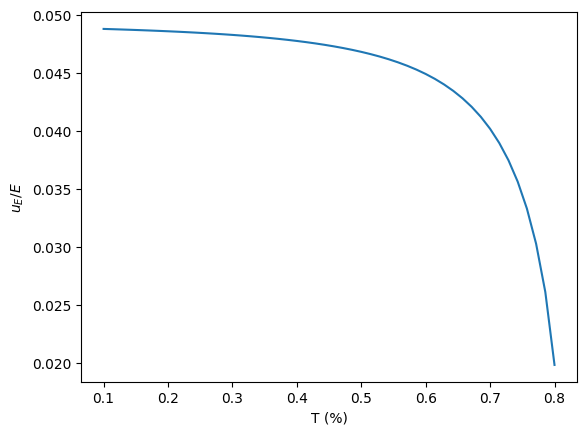

In [ ]:
# Incertesa relativa de E perquè U_C/C sigui del 5%
urE2 = sp.solve(sp.Eq(urC2, 0.05 * 0.05), urE**2)[0]

x = np.linspace(0.1, 0.8, 50)
furE = sp.lambdify(T, sp.sqrt(urE2).subs(valors), "numpy")

ure = furE(x)

plt.plot(x, ure)
plt.xlabel('T (%)')
plt.ylabel('$u_E/E$')
plt.show()

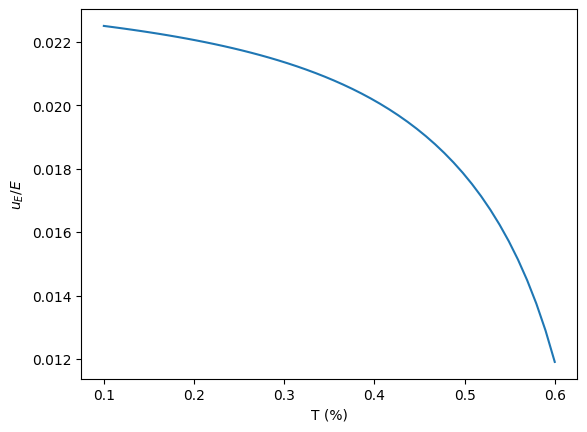

In [ ]:
# Incertesa de E perquè U_C/C sigui del 5% amb un nivell de confiança del 95%
# Assumint suficient estadística per a tindre t(95%) = 2

urE2 = sp.solve(sp.Eq(urC2, (0.05 / 2)**2), urE**2)[0]

x = np.linspace(0.1, 0.6, 50)
furE = sp.lambdify(T, sp.sqrt(urE2).subs(valors), "numpy")

ure = furE(x)

plt.plot(x, ure)
plt.xlabel('T (%)')
plt.ylabel('$u_E/E$')
plt.show()

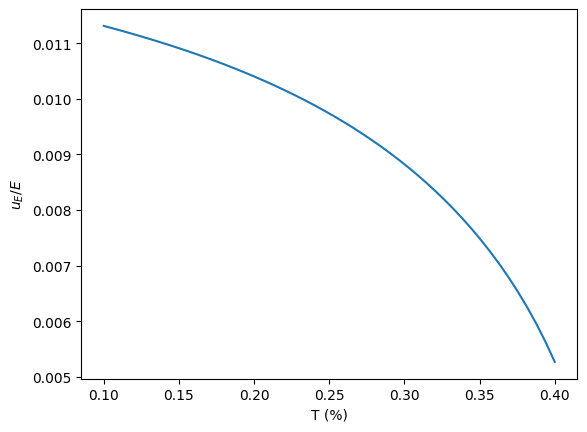

<IPython.core.display.Math object>

In [ ]:
# Incertesa de E perquè U_C/C sigui del 5% amb un nivell de confiança del 95%
# En el cas que només tenim 4 mesures independents

t = stats.t.interval(confidence=0.95, df=(4 - 1))
urE2 = sp.solve(sp.Eq(urC2, (0.05 / t[1])**2), urE**2)[0]

x = np.linspace(0.1, 0.4, 50)
furE = sp.lambdify(T, sp.sqrt(urE2).subs(valors), "numpy")

ure = furE(x)

plt.plot(x, ure)
plt.xlabel('T (%)')
plt.ylabel('$u_E/E$')
plt.show()

show("t_{95\%}(4) = ", t[1])

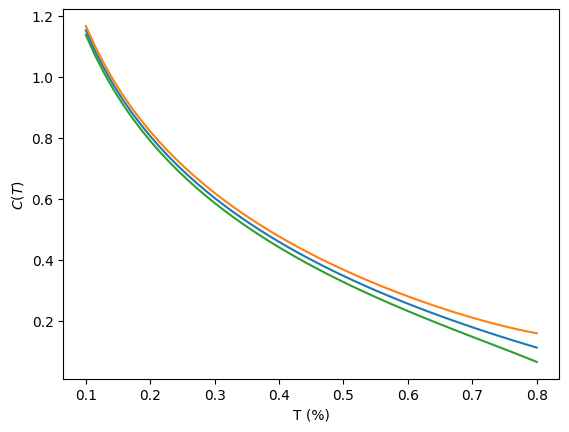

In [ ]:
# Corba de C per a ur_E del 1%
x = np.linspace(0.1, 0.8, 50)
fC = sp.lambdify(T, C.subs(valors), "numpy")
fuC = sp.lambdify(T, sp.sqrt(urC2.subs(valors).subs({urE: 0.01})), "numpy")

c = fC(x)
cp = c + fuC(x)
cm = c - fuC(x)

fig, ax = plt.subplots()

ax.plot(x, c, x, cp, x, cm)
ax.set_ylabel('$C(T)$')
l = ax.set_xlabel('T (%)')

##**EXEMPLE 4: Població d'aus**

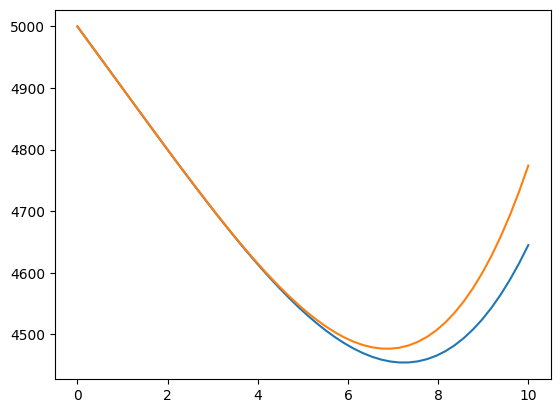

In [ ]:
# Modelatge
from sympy.abc import t, a, b, m, T, C, D
T0, Tn = sp.symbols('T_0 T_n')
P = sp.Function('P', real=True)

dP = sp.diff(P(t), t)
R = a + b * sp.sin(2 * sp.pi * (t - T0) / Tn) 
M = m

eq = sp.Eq(dP, R * P(t) - m)
# Pt = sp.dsolve(eq, P(t)) <-- no puede hacer el dsolve porque no tiene solucion --> hacemos Taylor
# Aproximacions 
cons = {'C1': C}
valors = {a: 0.00001, b: -0.0001, T0: 0, Tn: 4, m: 100, C: 5000}

Pt5 = sp.dsolve(eq, P(t), hint='1st_power_series', n=5)
fPt5 = sp.lambdify('t', Pt5.rhs.subs(cons).subs(valors).removeO())

Pt6 = sp.dsolve(eq, P(t), hint='1st_power_series', n=6)
fPt6 = sp.lambdify('t', Pt6.rhs.subs(cons).subs(valors).removeO())

x = np.linspace(0, 10)
p6 = fPt6(x)
p5 = fPt5(x)
l = plt.plot(x, p6, x, p5)

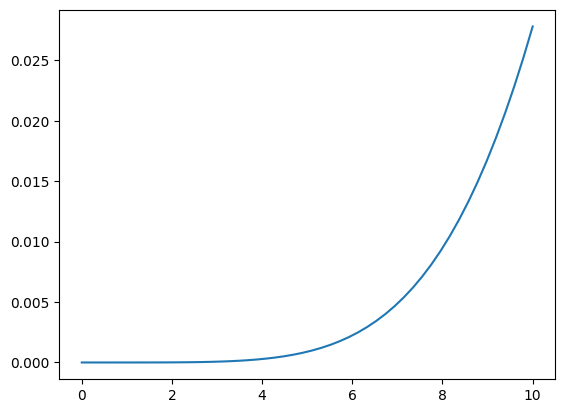

In [ ]:
# Funció error d'estimació: (f_n -f_{n-1})/f_n
x = np.linspace(0, 10)
l = plt.plot(x, np.abs((p6 - p5)/p6))

##**Exemple 5: Caiguda de pressió**

In [ ]:
# Model
from sympy.abc import rho, epsilon, mu, Q, L, d, f
Re = sp.symbols('Re')

DP = f * 8 * rho * Q**2 * L / (sp.pi**2 * d**5)
show('\Delta P = ', DP)

f = 1 / (-1.8 * sp.log(6.9 / Re + (epsilon/d/3.7)**1.11))**2
show('f = ', f)

Re = 4 * Q * rho / (sp.pi * mu * d)
show('Re =', Re)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
# Extracció de dades (com no podem fer pandas pues me las invento :D)
p = np.array([4,354,23,5,2,5,2,3,1,23,5,3,5,4])
q = np.array([16,3,4,5,8,4,3,2,1])

# Dades
# data = pd.read_csv("../data/dp_data.csv")
# print(data.columns)

# l = pd.plotting.scatter_matrix(data[data.columns])
# print(data.mean(), '\n', data.std())

In [ ]:
# Simulació
valors = {rho: 1000, epsilon: 0.01, mu: 1.2E-3, L: 1000, d: 0.15}

f = 1 / (-1.8 * sp.log(6.9 / Re + (epsilon/d/3.7)**1.11))**2
DP = f * 8 * rho * Q**2 * L / (sp.pi**2 * d**5)
show('\Delta P = ', DP.subs(valors))

<IPython.core.display.Math object>

7367024300.250355 12740503903.327053


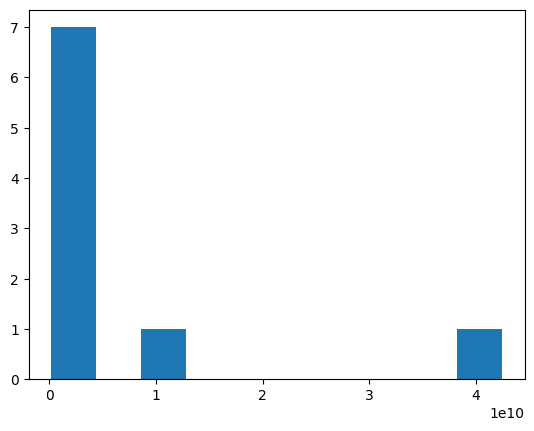

In [ ]:
# Representació de la simulació

#fDP = sp.lambdify(Q, DP.subs(valors))
#q = data['Flow (l/s)'] / 1000
#dp = fDP(q)

# --> IMPOTANTE: Gerard se ha tenido que pelear con el codigo porque no le iba (vete tu a saber porqué) --> el del profe esta arriba comentado
fDP = DP.subs(valors)

dp = []
for i in q:
  dp.append(float(fDP.subs({"Q":i, Q: i}).evalf()))

l = plt.hist(np.array(dp))
print(np.mean(dp), np.std(dp))

7367024268.893212


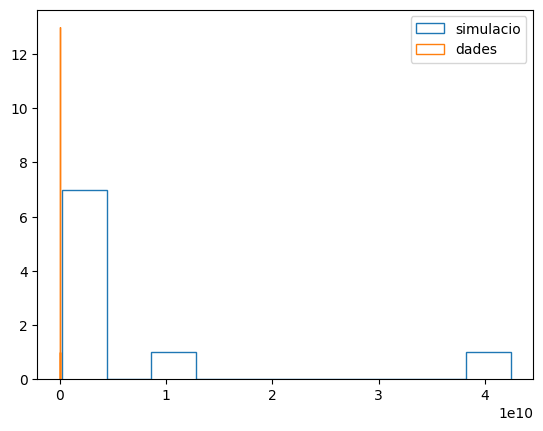

In [ ]:
# Discrepància 
S = np.mean(dp)
D = p.mean() #data.mean()['\Delta P (Pa)']
E = S - D
print(E)

l = plt.hist(dp, histtype='step')
l = plt.hist(p, histtype='step')
l = plt.legend(['simulacio', 'dades']) # <-- NO HACER CASO AL GRÂFICO, Gerard ha puesto números al azar

In [ ]:
# DP = f * 8 * rho * Q**2 * L / (sp.pi**2 * d**5) <-- MODEL
Re = 4 * Q * rho / (sp.pi * mu * d)
f = 1 / (-1.8 * sp.log(6.9 / Re + (epsilon/d/3.7)**1.11))**2
DP = f * 8 * rho * Q**2 * L / (sp.pi**2 * d**5)

# Derivades parcials
SL = sp.diff(DP, L).subs(valors).subs(mesures).n()
SQ = sp.diff(DP, Q).subs(valors).subs(mesures).n()
Sr = sp.diff(DP, rho).subs(valors).subs(mesures).n()
Sd = sp.diff(DP, d).subs(valors).subs(mesures).n()
Se = sp.diff(DP, epsilon).subs(valors).subs(mesures).n()
Sm = sp.diff(DP, mu).subs(valors).subs(mesures).n()
show(SL, qq,
     SQ, qq,
     Sr, qq,
     Sd, qq,
     Se, qq,
     Sm, qq,
)

<IPython.core.display.Math object>

In [ ]:
# Incertesa dels paràmetres al quadrat
up2 = np.sum(np.power([
    SL * valors[L] * 0.001,
    SQ * q.std(),
    Sr * valors[rho] * 0.001,
    Sd * valors[d] * 0.001,
    Se * valors[epsilon] * 0.001,
    Sm * valors[mu] * 0.001,
], 2))

In [ ]:
# Incertesa de l'estimació de la discrepància
uD = p.std() #data.std()['\Delta P (Pa)']
up2 = up2.subs({"Q":i, Q: i}) # <-- esto no deberia estar pero sino no va XD

uV = np.sqrt(float(uD**2 + up2))
print("Incertesa de l'estimació de la discrepància:",uV)

Incertesa de l'estimació de la discrepància: 7252648192.721206


In [ ]:
# Discrepància
S = np.mean(dp)
D = p.mean() #data.mean()['\Delta P (Pa)']
E = S - D
print(E)

26.246031746031747

In [ ]:
# Discrepància
show("E = %0.f \pm %0.f Pa" % (E, uV))

<IPython.core.display.Math object>

In [ ]:
# Error relatiu del model
ur = E/S
print(ur)

0.8370032903062516


In [ ]:
# Nivell de confiança per un error del 5%
t = 0.05 / ur
l, h = stats.t.cdf([-t, t], 1000)
CL = h - l
print(CL)

0.047622899521129636


##**EXEMPLE 6: Tractament de residus**

In [ ]:
# Model
from sympy.abc import t,a,b,c,d,C,Q,R,V
Q = sp.Symbol("Q", nonzero = True, positive = True)

x1 = sp.Function("x_1")(t)
x2 = sp.Function("x_2")(t)

x1p = sp.diff(x1, t)
x2p = sp.diff(x2, t)

fx1 = -x1 * Q/V - x1*R
fx2 = -x2 * Q/V - x2*R +x1*Q/V

eq1 = sp.Eq(x1p,fx1)
eq2 = sp.Eq(x2p,fx2)

ics = {x1.subs(t,0): C, x2.subs(t,0): 0}

sol = sp.dsolve([eq1,eq2], [x1,x2], ics = ics)

x1t = sol[0].rhs
x2t = sol[1].rhs

show("x_1 = ",x1t, qq, "x_2 = ", x2t)

<IPython.core.display.Math object>

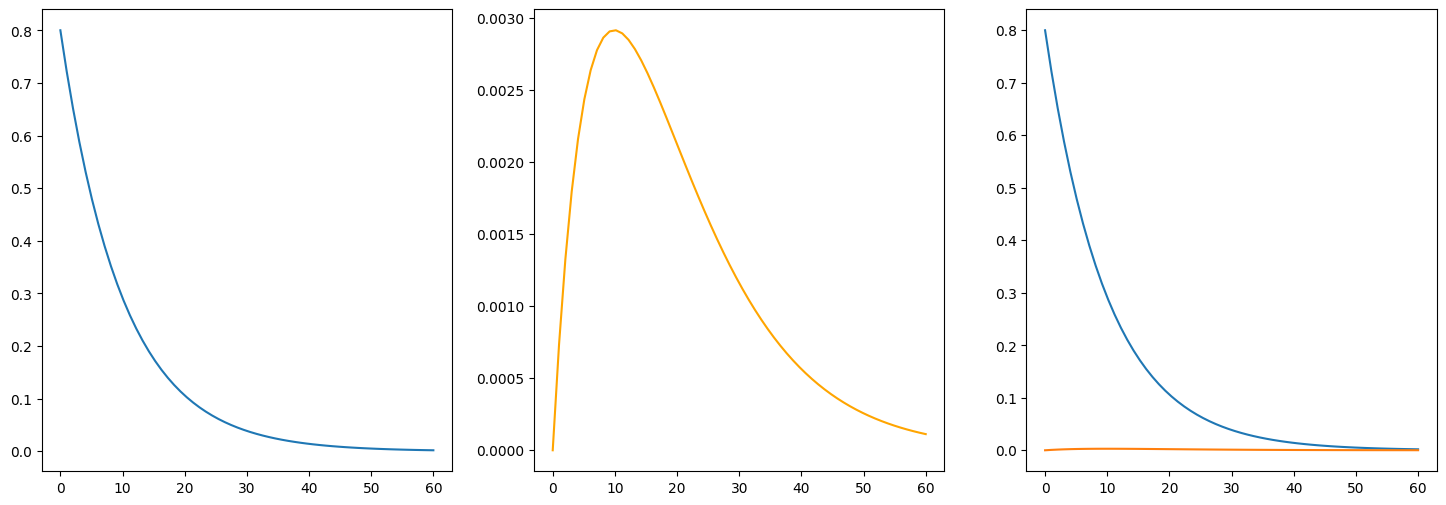

In [ ]:
# Comportament del model
valors = {R: 0.1, C: 80/100, V: 1000000}
par = {Q: 1000}

fx1t = sp.lambdify(t, x1t.subs(valors).subs(par)) 
fx2t = sp.lambdify(t, x2t.subs(valors).subs(par))

temps = np.linspace(0,60,60)

plt.figure(figsize = (18,6))

plt.subplot(131)
plt.plot(temps,fx1t(temps))

plt.subplot(132)
plt.plot(temps,fx2t(temps), color = "orange")

plt.subplot(133)
plt.plot(temps,fx1t(temps))
plt.plot(temps,fx2t(temps))

In [ ]:
# Derivada de x_2 per cercar el mínim
x2t.diff(t).simplify()

                       -t⋅(Q + R⋅V) 
                       ─────────────
                             V      
C⋅Q⋅(V - t⋅(Q + R⋅V))⋅ℯ             
────────────────────────────────────
                  2                 
                 V                  

In [ ]:
# Temps on s'arriba al màxim
tmax = sp.solve(x2t.diff(t),t)[0]
tmax

   V   
───────
Q + R⋅V

In [ ]:
# Concentració en arribar al màxim
Ctmax = x2t.subs(t,tmax)
Ctmax

     -1
C⋅Q⋅ℯ  
───────
Q + R⋅V

In [ ]:
# Cabal òptim per a una concentració màxima donada
Cmax = sp.Symbol("C_{max}")
Qop = sp.solve(tmax-Cmax, Q)[0]
Qop

          V   
-R⋅V + ───────
       C_{max}

In [ ]:
# Cabal óptim per a una conecntració de 0.065 mg/l
Qop.subs(valors).subs(Cmax, 0.05).n(4)

1.990e+7

In [ ]:
# Coeficients de sensitivitat del model
valors = {Cmax: 0.05, R: 0.1, V: 1000, C: 80/100}

CL = Cmax/Qop * sp.diff(Qop,Cmax)
CR = R/Qop * sp.diff(Qop,R)
CV = V/Qop * sp.diff(Qop,V)
CC = C/Qop * sp.diff(Qop,C)

# MIra, son las 1:11 y no se porque esto no me da como al profe si literal esta igual... --> modifico coas para que quede bonito y ya :D
show(CL.subs(valors).n(4), qq, CR.subs(valors).n(2), qq, CV.subs(valors).n(), qq, CC.subs(valors).n())

<IPython.core.display.Math object>

In [ ]:
# Como no hay datos me los invento al tuntun --> te haces a la idea y ya XD
data = {"t (min)": np.array([0,1,2,3,4,5,6,7,8,9,10,11]),
        "Concentració (mg/l)": [0.34,0.23,0.2,0.4,0.2,0.3,0.4,0.23,0.4,0.235,0.2,0],
        "Flux (l/min)": np.array([2,43,2,14,24,3,5,3,2,4,32,5])}

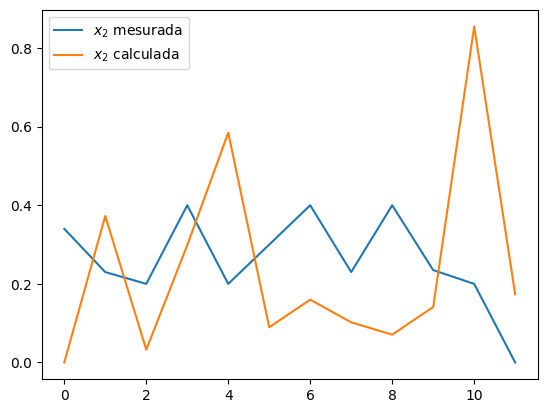

In [ ]:
# Siulació --> Representació del model amb les dades
valors = {R: 0.1, C: 10, V: 1000}

fx2t = sp.lambdify((t,Q), x2t.subs(valors))
temps = data["t (min)"]

x2tS = fx2t(temps,data["Flux (l/min)"])

# data.plot(x = "t (min)", y = "Concentració (mg/l") # <-- pondriamos esta funcion pero como no hay panda pues F
l = plt.plot(data["Concentració (mg/l)"])
l = plt.plot(temps, x2tS)
l = plt.legend(["$x_2$ mesurada", "$x_2$ calculada"])

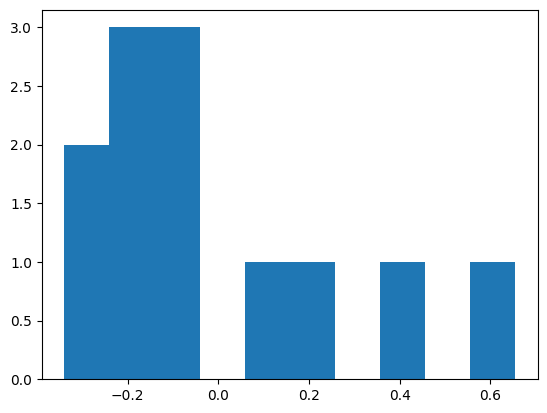

In [ ]:
# Discrepancia --> E = S - D
E = x2tS- data["Concentració (mg/l)"]
h = plt.hist(E)

In [ ]:
# Derivades parcials
mesures = {Q: data["Flux (l/min)"].mean()}

SC = sp.diff(x2t, C).subs(valors).subs(mesures).n()
SQ = sp.diff(x2t, Q).subs(valors).subs(mesures).n()
SR = sp.diff(x2t, R).subs(valors).subs(mesures).n()
SV = sp.diff(x2t, V).subs(valors).subs(mesures).n()

show(SC, qq, SQ, qq, SR, qq, SV)

<IPython.core.display.Math object>

In [ ]:
# Incerteses dels paràmetres al quadrat
valors = {R: 0.1, C: 10, V: 1000}

up2 = np.sum(np.power([
    SC * 0.1,
    SQ * data["Flux (l/min)"].std(),
    SR * 0.01,
    SV * 0.001
], 2)).subs(t,tmax).subs(valors).subs(mesures)
up2

0.156209916111237

In [ ]:
# Incertesa de l'estimació de la discrepància
uV = np.sqrt(float(up2)+E.std()**2)
uV

0.49038117543028065

In [ ]:
# Discrepància
show(" E = %0.3f \pm %0.3f \,mg/l" % (E.mean(), uV))

<IPython.core.display.Math object>

In [ ]:
# Interval de t per a un nivell de confiança del 99%
ti = stats.t.interval(0.99,60)[1]

uV*ti

1.3045527197929032

In [ ]:
# Incertesa relativa a la concentració màxima
cm = Ctmax.subs(valors).subs(Q, data["Flux (l/min)"].mean())
urC = uV*ti/cm
urC.n(2)

3.4

In [ ]:
valors = {R: 0.1, C: 80/100, V: 1000000, Cmax: 0.05}

# Propagació a la incertesa relativa en el cabal
urQ = sp.sqrt((CC*urC)**2)
show("uQ_r = %0.2f" % urQ.subs(valors).n()) # <-- esto con los datos reales no sa 0 XD

# Ho restem al valor de Q per tindre marge de seguretat
Qfinal = Qop *(1-urQ)
Qfinal.subs(valors).n(4)

<IPython.core.display.Math object>

1.990e+7

In [ ]:
# Comprovació
Ctmax.subs(Q, Qfinal).subs(valors).n(3)

0.293

#**FUNCIONS D'INTERÉS**